## 02 | popVAE Latent Dimension Plots

This notebook contains code for visualizing the Latent Dimensions obtained from the popVAE Variational Autoencoder.

**** AgAdapt Project ****

- Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- Load Latent Dimension data into a Pandas DataFrame.

In [2]:
ld_df = pd.read_csv("../Data/C__Processed_Data/Offspring_Genotype_Data/04__popVAE_Offspring_Data/Offspring_Latent_Dimensions.txt", delimiter = '\t')

# Discard <sd> columns.
ld_df.drop(["sd1", "sd2"], axis = 1, inplace = True)
# Rename <mean> columns to <LD>.
ld_df.rename(columns = {"mean1" : "LD1", "mean2" : "LD2", "sampleID" : "Sample"}, inplace = True)
# Set index to pedigree.
ld_df.set_index("Sample", inplace = True)

ld_df

,LD1,LD2
Sample,,
LH162/CG60,7.305439,2.402194
LH82/CG60,-31.135525,-8.106439
LH82/CGR01,-22.392998,-4.188796
LH82/LH198,-4.794639,-6.064219
LH198/CGR01,-2.890736,1.747539
...,...,...
Z037E0054/LH162,4.093797,1.138109
Z037E0054/PHZ51,13.153651,14.301002
Z038E0057/3IIH6,-6.007522,-1.336077


- Plot the two Latent Dimensions.

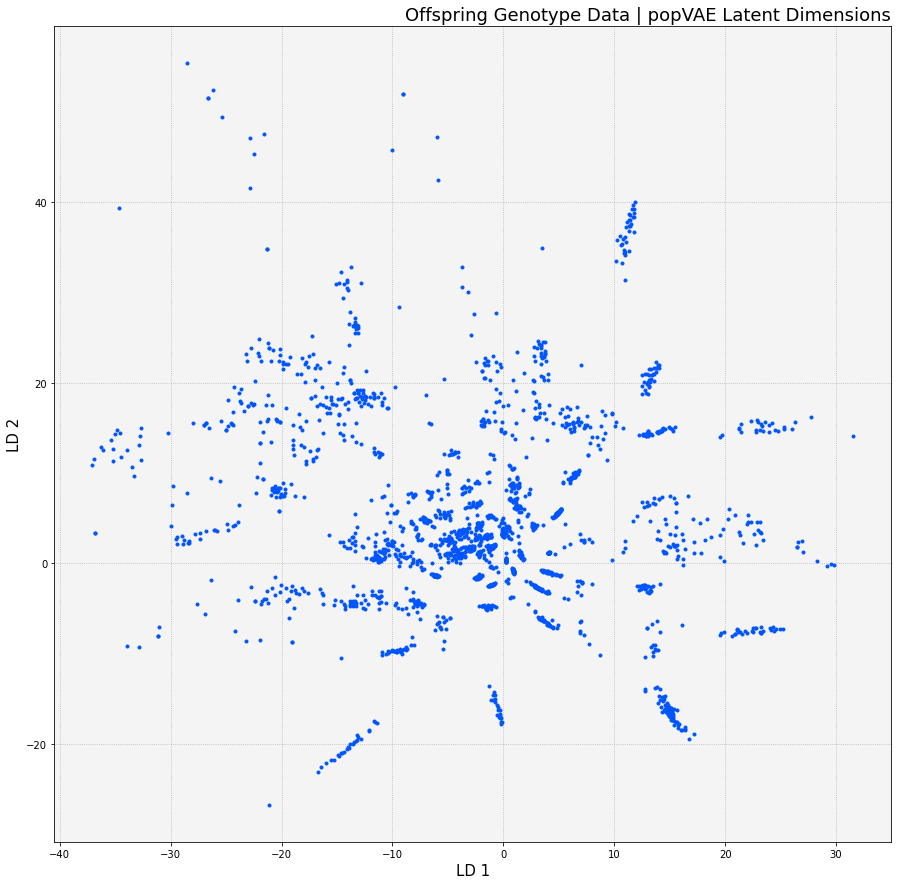

In [3]:
# Convert Latent Dimension DataFrame to arrays.
ld_01 = ld_df["LD1"].to_numpy()
ld_02 = ld_df["LD2"].to_numpy()

figure = plt.figure(figsize = (15, 15))

ld_plot = figure.add_subplot(1, 1, 1)
ld_plot.set_xlabel("LD 1", fontsize = 15)
ld_plot.set_ylabel("LD 2", fontsize = 15)
ld_plot.set_title("Offspring Genotype Data | popVAE Latent Dimensions", loc = "right", fontsize = 18)
ld_plot.set_facecolor("#F4F4F4")
ld_plot.grid(True, linestyle = ":")

for x, y in zip(ld_01, ld_02):
    ld_plot.plot(x, y, ".", color = "#0055FF")

- Save the plot to a file.

In [4]:
figure.savefig("../Results/Plots/popVAE_Offspring_Data/Latent_Dimensions.png", facecolor = "w", dpi = 500)

- Retrieve a subsample *cluster* of individuals by pinpointing the rough location in the plot.
- This allows confirmation of the clustering capabilities of popVAE.
- Notice that all individuals in this subsample **do** share the same male parent.

In [5]:
subsample_df = ld_df.loc[(ld_df["LD2"] < -13) & (ld_df["LD2"] > -20)]
subsample_df = subsample_df.loc[(subsample_df["LD1"] < 20) & (subsample_df["LD1"] > 10)]
subsample_df

,LD1,LD2
Sample,,
M0323/LH185,16.133219,-18.471773
M0186/LH185,14.833382,-16.652462
M0052/LH185,14.137816,-15.172900
M0287/LH185,14.940313,-16.431206
M0143/LH185,14.937815,-16.956770
...,...,...
M0326/LH185,14.644875,-15.987208
M0341/LH185,15.119033,-16.079008
M0345/LH185,12.762900,-14.129342


- Recreate the plot, highlighting the subsample individuals.

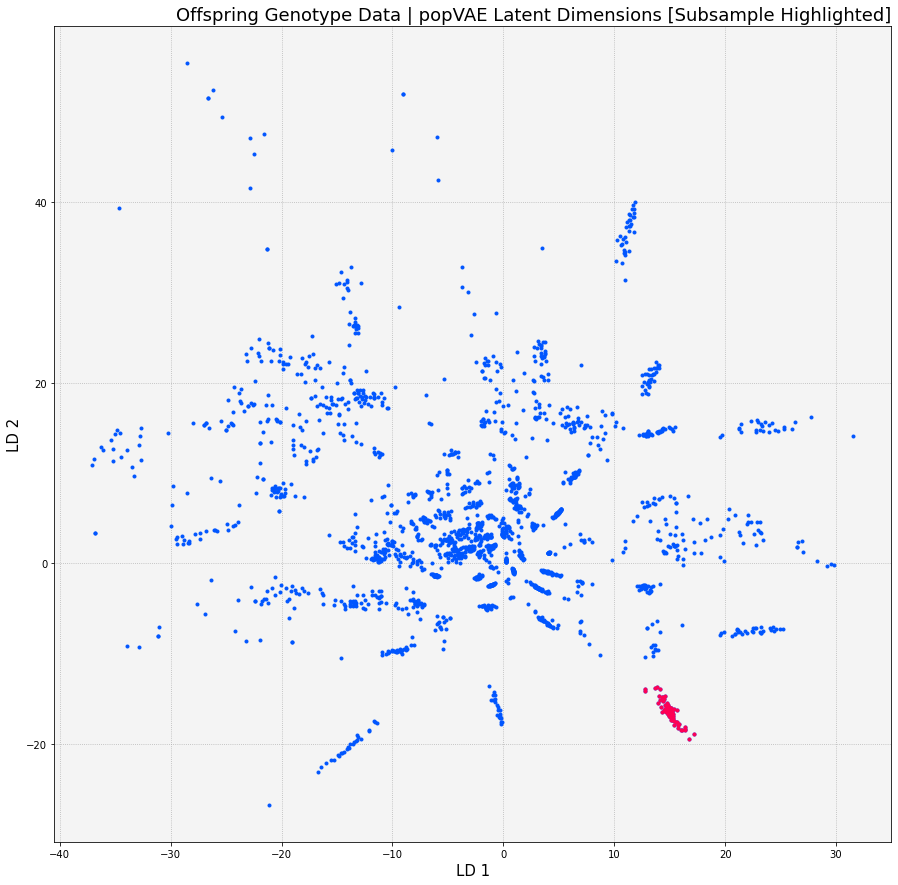

In [6]:
# Convert subsample DataFrame into arrays.
ss_01 = subsample_df["LD1"].to_numpy()
ss_02 = subsample_df["LD2"].to_numpy()

figure = plt.figure(figsize = (15, 15))

subsample_plot = figure.add_subplot(1, 1, 1)
subsample_plot.set_xlabel("LD 1", fontsize = 15)
subsample_plot.set_ylabel("LD 2", fontsize = 15)
subsample_plot.set_title("Offspring Genotype Data | popVAE Latent Dimensions [Subsample Highlighted]", loc = "right", fontsize = 18)
subsample_plot.set_facecolor("#F4F4F4")
subsample_plot.grid(True, linestyle = ":")

for x, y in zip(ld_01, ld_02):
    subsample_plot.plot(x, y, ".", color = "#0055FF")

for x, y in zip(ss_01, ss_02):
    subsample_plot.plot(x, y, ".", color = "#FF0055")

- Save the plot to a file.

In [7]:
figure.savefig("../Results/Plots/popVAE_Offspring_Data/Latent_Dimensions_Highlighted_Subsample.png", facecolor = "w", dpi = 500)

- Export subsample individual names to be used in the Principal Component plots.

In [8]:
subsample_names = subsample_df.index.values
np.savetxt("../Data/C__Processed_Data/Supplemental_Data/Reference_Subsample_Names.txt", subsample_names, fmt = "%s")